В этом уроке вы изучите непараметрические статистические тесты, используемые для сравнения двух и более групп.

После изучения этого урока вы будете знать:

*   критерий Манна-Уитни для сравнения двух независимых выборок;
*   критерий Уилкоксона для сравнения двух зависимых (связанных) выборок, парных наблюдений;
*   критерий Краскела-Уоллиса для сравнения медиан в нескольких выборках.

Согласно оригинальной постановке [1] тест Манна-Уитни предполагает, что даны две непрерывные случайные величины $X$ и $Y$ с функциями распределения $F_X(t)$ и $F_Y(t),$ соответственно. Тестируется нулевая гипотеза, состоящая в том, что $F_X(t) = F_Y(t),$ при альтернативной гипотезе, состоящей в том, что $X <_{st} Y,$ т. е. $X$ стохастически меньше $Y.$


**Определение**

Случайная величина $X$ стохастически меньше случайной величины $Y,$ если для любого $t \in \mathbb{R}$ справедливо $F_X(t) >F_Y(t).$

Существуют модификации теста Манна-Уитни, суть которых состоит в том, что расчетная процедура сохранятеся (ранжирование проводят по тем же правилам, критерий $U$ вычисляют по тем же формулам и т. д.), однако за счет более жестких предположений или иной формулировки нулевой и/или альтернативной гипотез удается дать более понятную интерпретацию результата [2].

Одна из таких модификаций тестирует нулевую гипотезу $F_X(t) = F_Y(t)$ при альтернативной $F_Y(t) = F_X(t + \Delta), \; \Delta > 0.$ Если принимается альтернативная гипотеза, то можно сделать содержательный вывод, что медиана $Y$ больше медианы $X.$


1. Mann, Henry B.; Whitney, Donald R. (1947). "On a Test of Whether one of Two Random Variables is Stochastically Larger than the Other". Annals of Mathematical Statistics. 18 (1): 50–60.


2. Fay, Michael P.; Proschan, Michael A. (2010). "Wilcoxon–Mann–Whitney or t-test? On assumptions for hypothesis tests and multiple interpretations of decision rules". Statistics Surveys. 4: 1–39.

# Задача 1


Есть две выборки, извлеченные из распределенных по закону Пуассона генеральных совокупнстей. Сравнить две выборки. Проверить, совпадают ли функции распределения двух соответствующих случайных величин или первая является стохастически меньше второй.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html

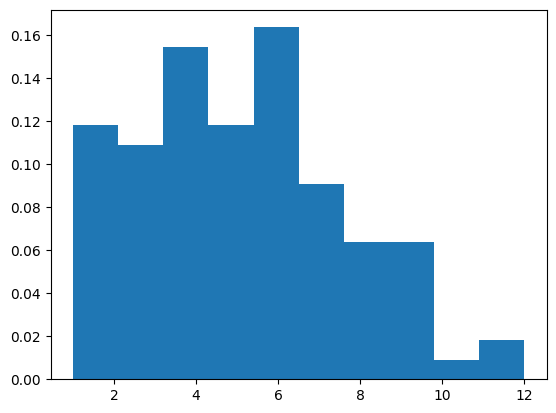

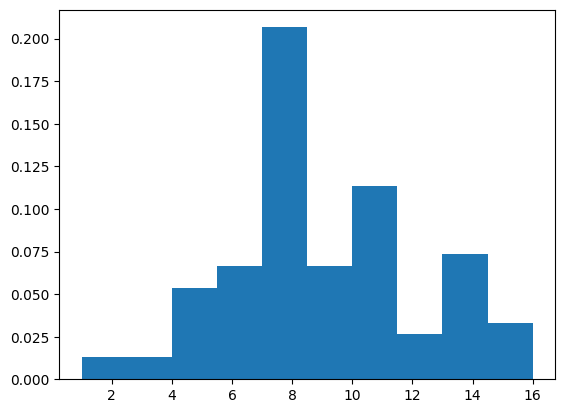

In [ ]:
import numpy as np
np.random.seed(3)
rng = np.random.default_rng()
data1 = rng.poisson(5, 100)
data2 = rng.poisson(9, 100)


import matplotlib.pyplot as plt
plt.hist(data1, density=True)
plt.show()
plt.hist(data2, density=True)
plt.show()

In [ ]:
print(data1)

[ 3  4  3  4  6  7  5  5  8  7  4  3  6  6  3  6  1  5  7  8  2  3  1 10
  4  5  4  5  3  5  6 10  4  2  8  7  5  3  2  3  2  5  5  4  3  5  3  5
  5  7  5  2  3  7 10  8  7  4  7  3  5  6  5  9  6  3  6  3  7  4  6  7
  1  6  6  5  5  3  5  8  8  1  2  6  6  6  6  4  5  7  5  7  8  3  4  3
  1  8  3  5]


In [ ]:
print(data2)

[14 11 13  9  7 11  3  9  9 14  5 10 10  9  9  8  9  6 11 13  6  8  7 15
  7 10  8 10 11  3  6  9 11  9  4  5  5  3 10  3  6  7  9 13  9  4 12  4
  8  7  9 10 11 10  7  9  7  9  7 11 10  7 12  5  9 11  6  8  8  7 10  4
  9  9 13 11  5  7 11  3 11 10 11 12 11  6  4  6 12  7 12  5  9  9  7  8
 13  8 12 11]


In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p >= alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1621.000, p=0.000
Different distribution (reject H0)


In [ ]:
print(p)

1.0781381620010937e-16


# Задача 2

Сорок пациентов проходили наблюдение и лечение. На углубленном неврологическом осмотре была использована визуально-аналоговая шкала для оценки (в баллах) интенсивности боли в кисти. После двухнедельного курса лечения пациенты снова были обследованы с использованием того же опросника. Используя баллы до и после лечения, ответить на вопрос: эффективно ли лечение в смысле уменьшения интенсивности боли.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html

In [ ]:
import numpy as np
np.random.seed(3)
rng = np.random.default_rng()

rng = np.random.default_rng()
n, p = 10, .6  # Just some parameters for binomial distribution
beforeTreatment = rng.binomial(n, p, 40)

afterTreatment = np.array([0]*40)
for i in range(len(beforeTreatment)):
  afterTreatment[i] = beforeTreatment[i] + rng.binomial(5, 0.5, 1) - 4
for i in range(len(beforeTreatment)):
  print(beforeTreatment[i], afterTreatment[i])

5 4
6 3
7 5
6 5
6 3
5 5
6 5
7 5
7 5
7 4
6 5
5 6
7 5
7 8
8 9
5 2
5 4
9 7
6 5
8 7
6 3
7 8
7 8
6 4
8 7
5 2
5 4
5 5
7 4
6 4
8 6
5 4
5 3
5 4
4 4
4 2
3 1
5 2
5 5
6 4


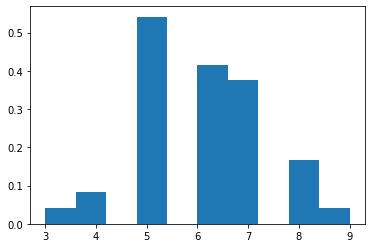

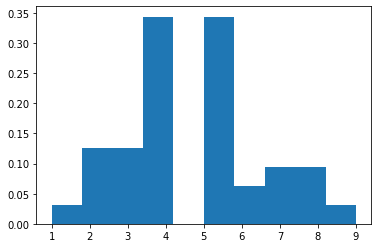

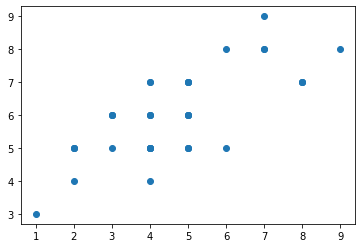

In [ ]:
import matplotlib.pyplot as plt
plt.hist(beforeTreatment, density=True)
plt.show()
plt.hist(afterTreatment, density=True)
plt.show()


plt.scatter(afterTreatment, beforeTreatment)
plt.show()

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(beforeTreatment, afterTreatment)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=42.500, p=0.000
Different distribution (reject H0)
